# Image Deblurring - June Exam
# Memoona Shah - 0001056334

A Convolutional neural network, ever since its conception has almost exclusively be associated with computer vision applications. That’s because their architecture is specifically suited for performing complex visual analyses. Thats why in this project i tried to create a CNN that can reconstruct deblurred image from the blurred image. The idea is to make it as simple as possible but also an acceptable visial results also.

### Dataset creation - DO NOT MODIFY

In [ ]:
!sudo pip3 install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import random
from cv2 import GaussianBlur
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D, Dense, Flatten, Layer, ReLU
from keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import metrics

def getDataset():
  (x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
  print(x_train.shape)
  normalize = lambda x: x/x.max()
  x_train = normalize(x_train)
  x_test = normalize(x_test)
  createBlurred = lambda arr: np.array([GaussianBlur(x, (5,5), ((random.random()*3)+1)) + (0.02*np.random.normal(0,1, (32, 32, 3))) for x in arr])
  return (createBlurred(x_train), x_train), (createBlurred(x_test), x_test)

##Getting the dataset:
x_train_b is the blurred data and x_train_o is the original unblurred images. and same for the test sets. For validation we will use entire test set instead of creating a split to analyse the results more accurately.

In [ ]:
(x_train_b, x_train_o), (x_test_b,x_test_o) = getDataset()

170508288/170498071 [==============================] - 14s 0us/step
(50000, 32, 32, 3)


CHecking the size/dimension of our train and test sets so we can create our input and output layer accordingly.

In [ ]:

print(x_train_b.shape)
print(x_train_o.shape)
print(x_test_b.shape)
print(x_test_o.shape)

(50000, 32, 32, 3)
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


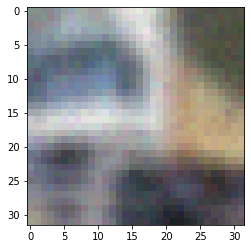

In [ ]:
plt.imshow(x_train_b[1])

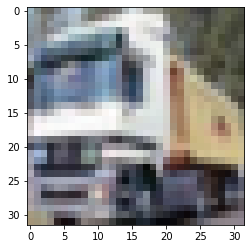

In [ ]:
plt.imshow(x_train_o[1])

## **Introduction:** In this project we are expected to create a Neural network model that can efficiently deblur the images that have been corrupted with the gaussian noise. Since, this is an image processing task, the methodology chosen is convolutional neural network. We will here try to create a model similar to SRCNN network but a simpler version of it called DeblurCNN. At the same time, a simple convolution network as learned in the lab sessions will also be tried. In the end, we will compare both ways to see which one is better for the task at hand in this project that is deblurring of images from gausian blur.


###Creating the neural network:
we call this our model one. at this stage i would like to create and test a simple convolutional neural network and then to try some complex models from literature. In the end a comparative analysis will be done.


##Model 1:

**Input layer:** The input is an image of dimensions 32 by 32 with 3 channels. hence we need to define an input shape and pass it to input layer.

**Output Layer:**  Since we want to just deblur the image we want the same dimensions of the image at the output layer too. for this purpose we have used a conv2d layer with 3 filters, kernel size 1 and sigmoid as activation function.

**Hidden Layers:** Since this is going to be a simple CNN we will ofcourse use convolutionhere. but since we want to convolve a kernel on an image we will use 2D convolution layers.


> *kernel Size:* Since out images are of small resolution, using a kernel of size higher than 5 would not be a suitable choice. Besides, larger kernel size also increases training time. so we will stick to 5,3,1 as kernel size and will not exceed 5. One more of the reasons to prefer small kernel sizes over fully connected network is that it reduces computational costs and weight sharing that ultimately leads to lesser weights for back-propagation. Just like in the famous VGG convolution neural networks of 2015 which replaced such large convolution layers by 3x3 convolution layers but with a lot of filters.
  Also we choose odd kernels over even because for an odd-sized filter, all the previous layer pixels would be symmetrically around the output pixel. for example:

 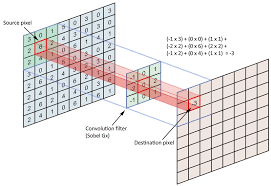


> *Filter size:* Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution). Here, we will start with filter size of 32 and will increase in a cetrain pattern of 64, 128 and so on. Convolutional neural networks (convNets) use hierarchical features in their processing pipeline. The features in lower layers are primitive while those in upper layers are high-level abstract features made from combinations of lower-level features. In other words, The richness of possible representations increases because a given layer feeds directly from a layer below to form new kernels by combinations of the features in the layer below. Thats why we choose to increase the filters with each layer.


> *padding, stride and activation functions:* In this model for the ease of analysis, we will keep the stride=1 (by default) and padding ='same'; "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input.








In order to get acceptable results we have created the following model with five 2D convolutional layers with relu as the activation function.  at first only 3 layers were added with kernel size of five but the results were not so satisfactory considering the small size of the images. Hence, we reduce the kernel size to 3 to observe the results. as for the output layer the kernel size is 1 so as to match the output dimension requirements.


Batch size: Batch size is chosen 30 because at 50 or more there was some overfitting. hence les

In [ ]:
xin = Input(shape=(32,32,3))
x = Conv2D(32,kernel_size=3,padding='same',activation='relu')(xin)
x = Conv2D(64,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(128,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(256,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(512,kernel_size=3,padding='same',activation='relu')(x)
res = Conv2D(3,kernel_size=1,activation='relu')(x)
mynet = Model(inputs=xin,outputs=res)


In [ ]:

mynet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 3)         1539  

In [ ]:
mynet.compile(optimizer='adam',loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()])

In [ ]:
mynet.fit(x_train_b,x_train_o, shuffle=True, epochs=10, batch_size=30,validation_data=(x_test_b,x_test_o))

Epoch 1/10
1667/1667 [==============================] - 79s 40ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 2/10
1667/1667 [==============================] - 65s 39ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 3/10
1667/1667 [==============================] - 65s 39ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 4/10
1667/1667 [==============================] - 64s 39ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5/10
1667/1667 [==============================] - 64s 39ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 6/10
1667/1667 [==============================] - 64s 39ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoc

In [ ]:
loss,acc=mynet.evaluate(x_test_b,x_test_o)
print("test loss = ",loss)
print("test accuracy = ",acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.0028 - mean_squared_error: 0.0028
test loss =  0.002823883667588234
test accuracy =  0.002823883667588234


In [ ]:
def show(x, y, z):
    title=['Original', 'Blurred', 'predicted']
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(x)
    plt.title(title[0])
    plt.subplot(1, 3, 2)
    plt.imshow(y)
    plt.title(title[1])
    plt.subplot(1, 3, 3)
    plt.imshow(z)
    plt.title(title[2])
    plt.show()
#for i in range(0,20):
#  show(x_test_b[i, :, :],x_test_o[i,:,:,:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


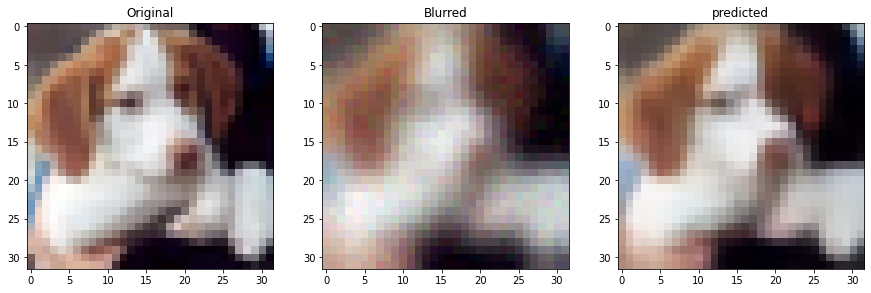

In [ ]:
# Qualitative results
y_pred = mynet.predict(x_test_b[:])
show(x_test_o[16, :, :], x_test_b[16, :, :], y_pred[16, :, :, :])


The results witnessed in the above model are not bad but are not enough.The parameters used are also a lot compared to what we see in the image results. There are many points that seem different from the original. Also the mse figure can also be reduced further. Now we will try to increase the number of convolutional layers and in the next step we will add a fully connected later. lets try the former followed by the later.

Also it can be seen that there isn't any overfitting or underfitting. This with more improvements its possible to find a good model to deblur the images at hand.

##Model2: Addition of another convolutional layer with more parameters.
Now we add one more layer and check the progress.

In [ ]:
xin = Input(shape=(32,32,3))
x = Conv2D(32,kernel_size=3,padding='same',activation='relu')(xin)
x = Conv2D(64,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(128,kernel_size=3 ,padding='same',activation='relu')(x)
x = Conv2D(256,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(512,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(512,kernel_size=3,padding='same',activation='relu')(x)
res = Conv2D(3,kernel_size=1,activation='sigmoid')(x)
mynet2 = Model(inputs=xin,outputs=res)

mynet2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 256)       295168    
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 512)       2359

In [ ]:
mynet2.compile(optimizer='adam',loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()])

In [ ]:
mynet2.fit(x_train_b,x_train_o, shuffle=True, epochs=10, batch_size=30,validation_data=(x_test_b,x_test_o))

Epoch 1/10
1667/1667 [==============================] - 136s 80ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 2/10
1667/1667 [==============================] - 131s 79ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 3/10
1667/1667 [==============================] - 131s 79ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 4/10
1667/1667 [==============================] - 131s 78ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 5/10
1667/1667 [==============================] - 130s 78ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 6/10
1667/1667 [==============================] - 130s 78ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_error: 0.002

In [ ]:
loss,acc=mynet2.evaluate(x_test_b,x_test_o)
print("test loss = ",loss)
print("test accuracy = ",acc)

313/313 [==============================] - 9s 28ms/step - loss: 0.0026 - mean_squared_error: 0.0026
test loss =  0.0026208125054836273
test accuracy =  0.0026208125054836273


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


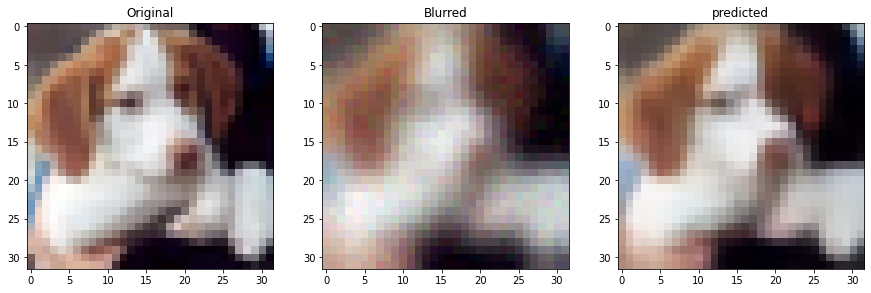

In [ ]:
# Qualitative results
y_predm2 = mynet.predict(x_test_b[:])
show(x_test_o[16, :, :], x_test_b[16, :, :], y_predm2[16, :, :, :])

The results although better quantitatively, do not improve very much qualitatively. Also the number of parameters also exceed the limits allowed.

**Model** 3: **Addition of a dense layer:** We will try to reduce the no of parameters and try to introduce fully connected layers to find of the results improve. We chose to test with dense layer to be able to reduce number of parameters also. In this model three we can witness only 1.8 million parameters as compared to 1.5 in first model and 11 million in the model 2.

In [ ]:
xin = Input(shape=(32,32,3))
x = Conv2D(32,kernel_size=3,padding='same',activation='relu')(xin)
x = Conv2D(64,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(128,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(256,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(512,kernel_size=3,padding='same',activation='relu')(x)
d1 = Dense(512, activation='relu')(x)
x = Dropout(0.6)(d1)
res = Conv2D(3,kernel_size=1,activation='relu')(x)
mynet3 = Model(inputs=xin,outputs=res)
mynet3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 256)       295168    
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 512)       1180160   
                                                                 
 dense (Dense)               (None, 32, 32, 512)       2626

In [ ]:
mynet3.compile(optimizer='adam',loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()])

In [ ]:
mynet3.fit(x_train_b,x_train_o, shuffle=True, epochs=15, batch_size=30,validation_data=(x_test_b,x_test_o))

Epoch 1/15
1667/1667 [==============================] - 102s 60ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 2/15
1667/1667 [==============================] - 100s 60ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 3/15
1667/1667 [==============================] - 99s 59ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 4/15
1667/1667 [==============================] - 99s 59ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5/15
1667/1667 [==============================] - 99s 59ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 6/15
1667/1667 [==============================] - 98s 59ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Ep

In [ ]:
loss,acc=mynet3.evaluate(x_test_b,x_test_o)
print("test loss = ",loss)
print("test accuracy = ",acc)

313/313 [==============================] - 6s 21ms/step - loss: 0.0029 - mean_squared_error: 0.0029
test loss =  0.002887645037844777
test accuracy =  0.002887645037844777


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


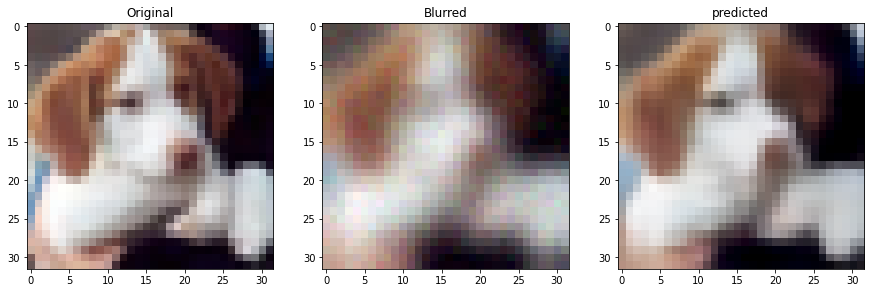

In [ ]:
# Qualitative results
y_predm3 = mynet3.predict(x_test_b[:])
show(x_test_o[16, :, :], x_test_b[16, :, :], y_predm3[16, :, :, :])

The results of the network with a dense layer makes the figures even worse. also comparing the results of all three models we created we can see that the results are fine for just convolutional layers. We have intentionally skipped using maxpooling layers because they result in data loss and since our images are of small dimension, it doesnt seem like a good idea to do that. Now in the final model, we will try to reduce the number of parameters and increase the epochs to see if that improves the results. I will also make some last layers have less filters and than increase again to see if they capture some more features than before. Because our first set of convolutional layers with increasing filters do capture some major features, i will try to gain more smaller and bigger features also in the second set of conv2d layers.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


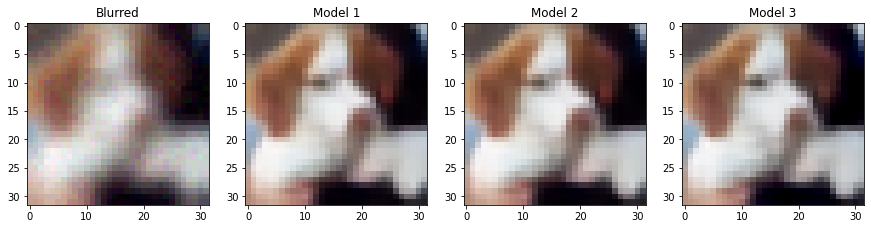

In [ ]:
def show4(w, x, y, z, titles):
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 4, 1)
    plt.imshow(w)
    plt.title(titles[0])
    plt.subplot(1, 4, 2)
    plt.imshow(x)
    plt.title(titles[1])
    plt.subplot(1, 4, 3)
    plt.imshow(y)
    plt.title(titles[2])
    plt.subplot(1, 4, 4)
    plt.imshow(z)
    plt.title(titles[3])
    plt.show()
show4(x_test_b[16,:,:],y_pred[16, :, :], y_predm2[16, :, :], y_predm3[16, :, :, :],    titles=['Blurred', 'Model 1', 'Model 2', 'Model 3']
)




## **Final Model:** We tried two sets of conv2d layers with increasing filters in both and it did improve the results significantly. Also the number of epochs we chose here is more to see if more imrovement is possible.



In [ ]:
xin = Input(shape=(32,32,3))
#first set of conv2d layers
x = Conv2D(32,kernel_size=3,padding='same',activation='relu')(xin)
x = Conv2D(64,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(128,kernel_size=5,padding='same',activation='relu')(x)
x = Conv2D(256,kernel_size=5,padding='same',activation='relu')(x)
x = Conv2D(512,kernel_size=5,padding='same',activation='relu')(x)
#second set of conv2d layers
x = Conv2D(64,kernel_size=5,padding='same',activation='relu')(x)
x = Conv2D(128,kernel_size=5,padding='same',activation='relu')(x)
x = Conv2D(256,kernel_size=5,padding='same',activation='relu')(x)
x = Conv2D(512,kernel_size=5,padding='same',activation='relu')(x)
res = Conv2D(3,kernel_size=1,activation='sigmoid')(x)
mynetwork = Model(inputs=xin,outputs=res)
mynetwork.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 256)       819456    
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 512)       3277312   
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        819264

In [ ]:
mynetwork.compile(optimizer='adam',loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()])
history=mynetwork.fit(x_train_b,x_train_o, shuffle=True, epochs=20, batch_size=30,validation_data=(x_test_b,x_test_o))

Epoch 1/20
1667/1667 [==============================] - 234s 132ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 2/20
1667/1667 [==============================] - 216s 129ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 3/20
1667/1667 [==============================] - 215s 129ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 4/20
1667/1667 [==============================] - 215s 129ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 5/20
1667/1667 [==============================] - 215s 129ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 6/20
1667/1667 [==============================] - 215s 129ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0025 - val_mean_squared_error:

In [ ]:
#Quantitative results
loss,acc=mynetwork.evaluate(x_test_b,x_test_o)
print("test loss = ",loss)
print("test accuracy = ",acc)


313/313 [==============================] - 15s 45ms/step - loss: 0.0023 - mean_squared_error: 0.0023
test loss =  0.002271652454510331
test accuracy =  0.002271652454510331


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


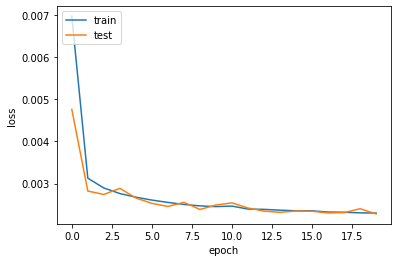

In [ ]:
def plot_history(model_history,keys):
    m,val_m = keys
    plt.plot(model_history.history[m])
    plt.plot(model_history.history[val_m])
    plt.ylabel(m)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_history(history,['loss','val_loss'])

In [ ]:
# Qualitative results
prediction = mynetwork.predict(x_test_b[:])



This model with two sets of conv2d layers with increasing filters , one starting from 32 and other from 64 does improve the results.The loss has reduced significantly also due to higher number of epochs but also because of the archutecture chosen we can observe good performance in the initial epochs too.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


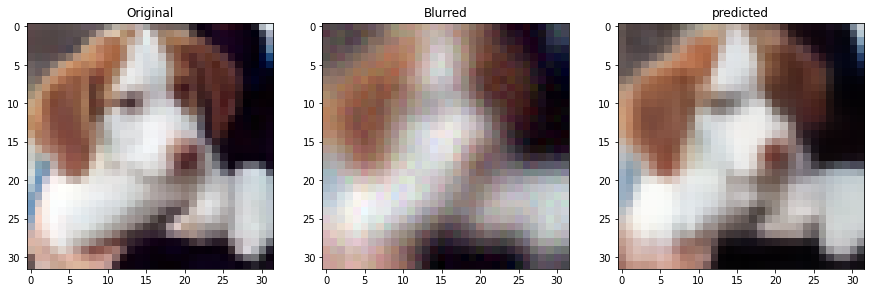

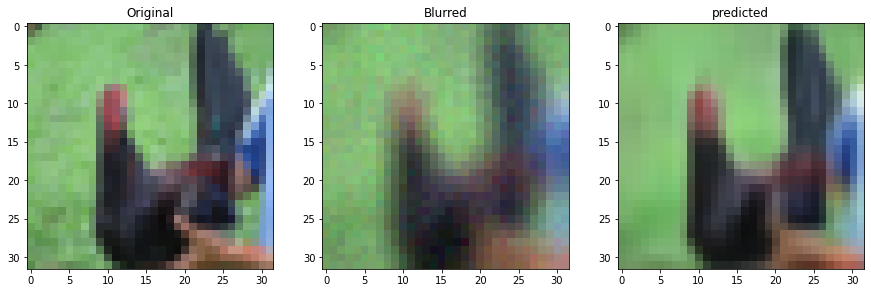

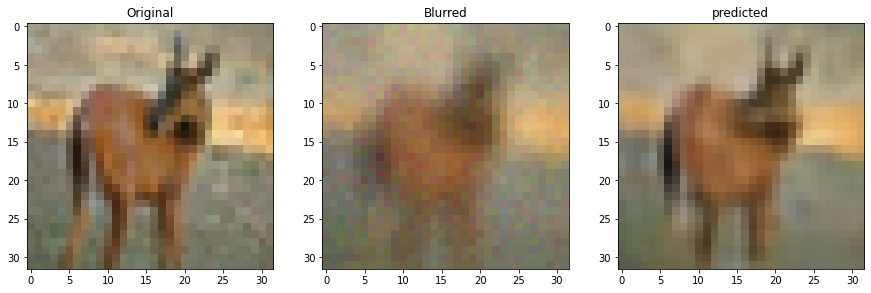

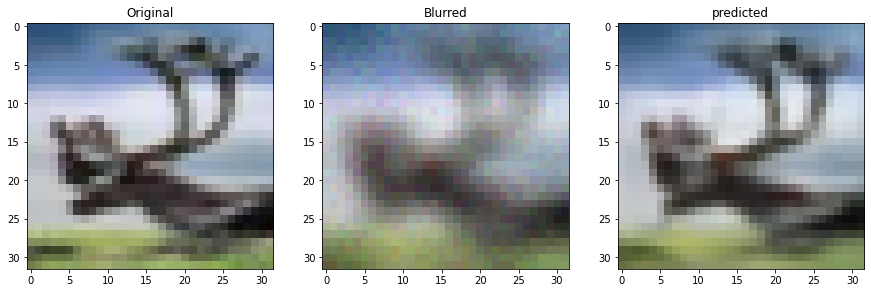

In [ ]:
show(x_test_o[16, :, :], x_test_b[16, :, :],prediction[16, :, :, :])
show(x_test_o[25, :, :], x_test_b[25, :, :],prediction[25, :, :, :])
show(x_test_o[36, :, :], x_test_b[36, :, :],prediction[36, :, :, :])
show(x_test_o[40, :, :], x_test_b[40, :, :],prediction[40, :, :, :])

In [ ]:
mynetwork.save_weights('mynetwork_weights.h5')